Data Source:

De Cock, D. (2011). Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project. Journal of Statistics Education, 19(3). https://doi.org/10.1080/10691898.2011.11889627

In this tutorial, we use Pyreal to produce a partial dependence plot for the AmesHousing dataset

First, we load in the data. Pyreal expects all data as DataFrames, where columns have the feature names.

Next, we load in the interpretable feature descriptions.

Next, we load the transfomers.

The first kind of transformer manually imputes the data based on information we know about the dataset.
We will call this the `AmesHousingImputer`

This imputation code comes from https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

Now, we can initialize the PartialDependenceExplainer Explainer object.

In [1]:
from pyreal.explainers import PartialDependenceExplainer
from pyreal.visualize import partial_dependence_plot

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

We can make predictions using Explainer objects.

In [4]:
import pandas as pd
X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X, y)
features = [0, 1]
x_orig = pd.DataFrame(X)
y_train = pd.DataFrame(y)
explainer = PartialDependenceExplainer(clf, 
                                       features,
                                       x_train_orig=x_orig, 
                                       y_train=y_train,
                                       )

explainer.fit()

TypeError: __init__() got an unexpected keyword argument 'y_orig'

In [ ]:
pdp = explainer.produce()

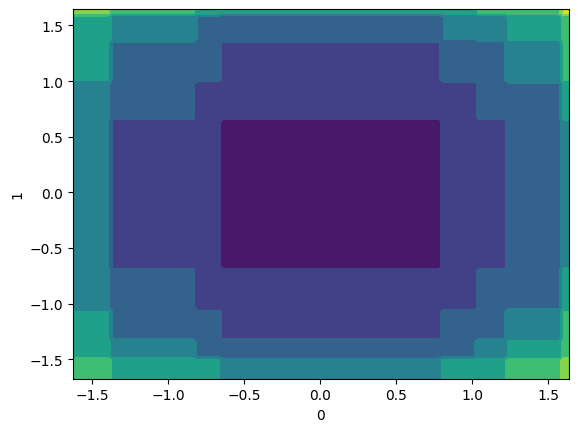

In [ ]:
partial_dependence_plot(pdp, show=True)

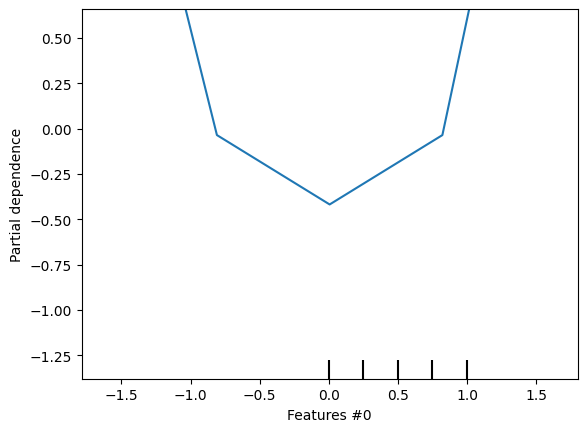

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

features, feature_names = [(0,)], [f"Features #{i}" for i in range(X.shape[1])]
deciles = {0: np.linspace(0, 1, num=5)}
pd_results = partial_dependence(
    clf, X, features=features, kind="average", grid_resolution=5)
display = PartialDependenceDisplay(
    [pd_results], features=features, feature_names=feature_names,
    target_idx=0, deciles=deciles
)
display.plot(pdp_lim={1: (-1.38, 0.66)})

plt.show()